In [2]:
import warnings
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

ValueError: x and y must be the same size

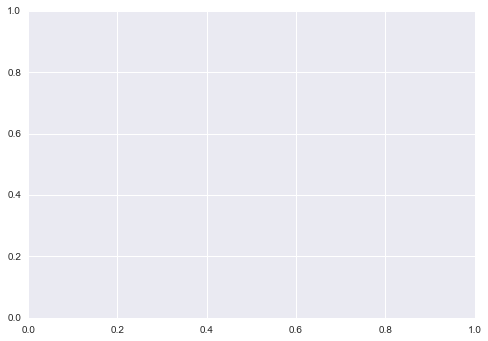

In [10]:
result = pd.read_csv("lassridge_sol.csv")



### Number of rows and columns

In [3]:
data_shape = train.shape
print("Number of columns: "+ str(data_shape[1]))
print("Number of rows: "+ str(data_shape[0]))

Number of columns: 81
Number of rows: 1460


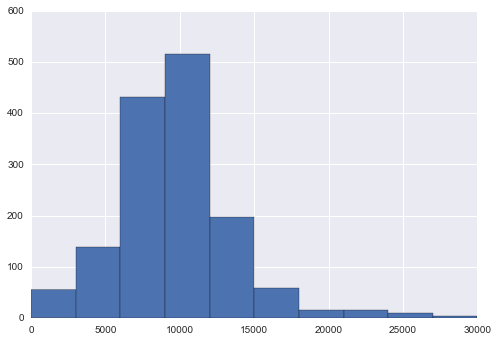

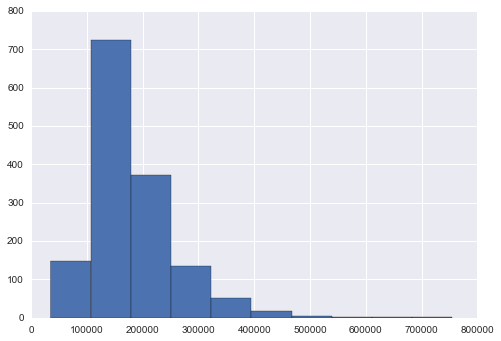

In [4]:
plt.hist(train.LotArea, range=[0, 30000])
plt.show()

plt.hist(train.SalePrice)
plt.show()

Axes(0.125,0.125;0.775x0.775)


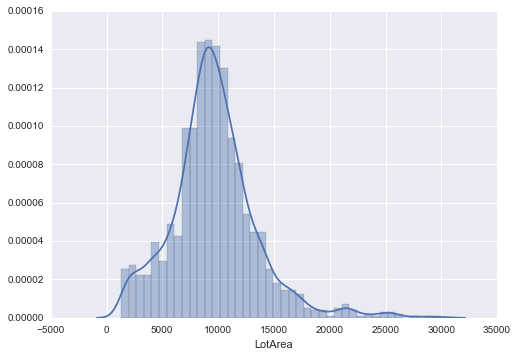

In [5]:
print(sns.distplot((train.LotArea[train.LotArea<30000])))



Axes(0.125,0.125;0.775x0.775)


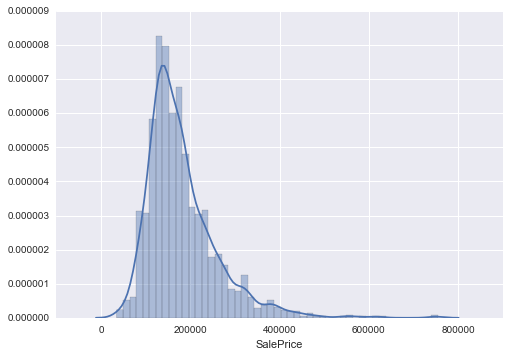

In [6]:
print(sns.distplot((train.SalePrice)))

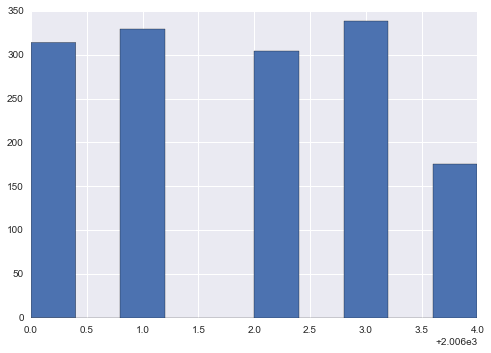

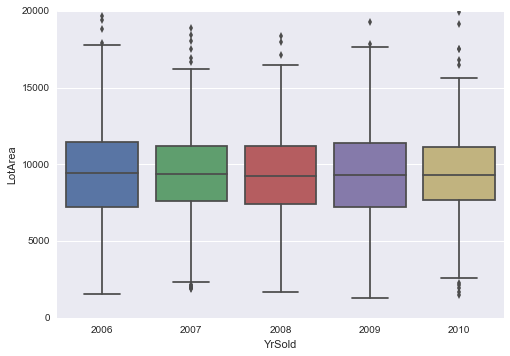

In [7]:
plt.hist(train.YrSold)
plt.show()

sns.boxplot(train.YrSold,train.LotArea[train.LotArea<20000])
#print(sns.distplot((data.YrSold)))

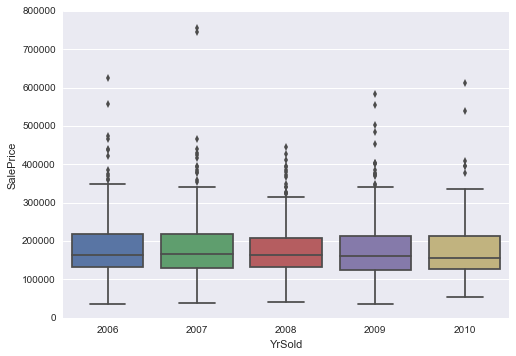

In [8]:
sns.boxplot(train.YrSold,train.SalePrice)

In [9]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Preprocessing
Log transform

In [10]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

Adding dummy values

In [11]:
all_data = pd.get_dummies(all_data)

In [12]:
all_data = all_data.fillna(all_data.mean())

### Correlation

In [40]:
j = 0
for i in (np.corrcoef(train[numeric_feats])[-1]):
    print (list(train)[j],"   ", i)
    j+=1

Id     0.986588401024
MSSubClass     0.998116677216
MSZoning     0.989717904014
LotFrontage     0.987514484167
LotArea     0.985821433484
Street     0.985641891161
Alley     0.994348832546
LotShape     nan
LandContour     0.955265842797
Utilities     0.990155965861
LotConfig     0.995612928864
LandSlope     0.987860677186
Neighborhood     nan
Condition1     0.984995731985
Condition2     nan
BldgType     0.966486457984
HouseStyle     nan
OverallQual     0.985748666377
OverallCond     0.990793979158
YearBuilt     0.988374151479
YearRemodAdd     0.979772203928
RoofStyle     0.983914669489
RoofMatl     0.977525927394
Exterior1st     0.916173468362
Exterior2nd     nan
MasVnrType     0.982114528447
MasVnrArea     0.98736074637
ExterQual     0.993706418259
ExterCond     0.988694101983
Foundation     0.971572784617
BsmtQual     0.984584094348
BsmtCond     nan
BsmtExposure     0.98859034081
BsmtFinType1     0.995181425216
BsmtFinSF1     0.981780808725
BsmtFinType2     0.979575543876
BsmtFinSF2 

IndexError: list index out of range

In [44]:
from sklearn.decomposition import PCA
X = all_data[:train.shape[0]]
pca = PCA(n_components=81)
# X is the matrix transposed (n samples on the rows, m features on the columns)
pca.fit(X)

X_new = pca.transform(X)
print (X_new)

[[  7.89064823e+01  -3.66886291e+01   8.70215304e-01 ...,   1.43462116e-01
   -6.36388055e-02  -3.72189952e-03]
 [ -1.30614690e+01   1.74789590e-01  -1.01585869e+01 ...,  -8.15979576e-03
   -6.54406245e-02  -1.50770634e-01]
 [  1.38343535e+02  -2.80016748e+01   9.91517547e-01 ...,   1.36007187e-01
   -1.10536022e-01  -2.52785173e-02]
 ..., 
 [ -2.23327665e+02   1.30174055e+01   3.28700367e+01 ...,  -7.77213572e-02
   -4.45434950e-01  -2.68560184e-01]
 [ -2.34562831e+02   4.48584221e+00   1.93569069e+01 ...,  -1.12282609e-01
   -1.05957808e-01   2.27845709e-01]
 [ -1.97970273e+02   9.06487939e-01  -1.47619913e+01 ...,   5.70792685e-01
   -3.20701898e-02   3.77843382e-01]]


In [48]:
from sklearn.feature_selection import VarianceThreshold
X = all_data[:train.shape[0]]
print (X.shape[1])
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)
print (X.shape[1])

288
288


### Creating test and train set

In [13]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [14]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.cross_validation import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="mean_squared_error", cv = 5))
    return(rmse)

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Implementing Ridge Regression

In [15]:
model_ridge = Ridge()

In [16]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Sco

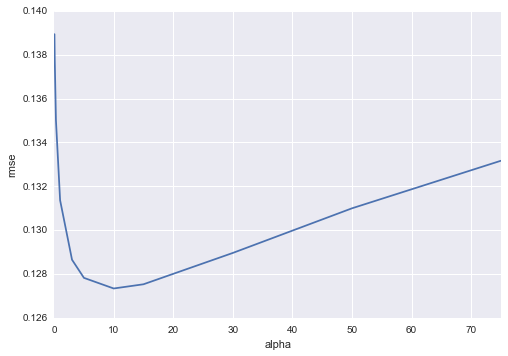

In [17]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = " ")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [18]:
cv_ridge.min()

0.12733734668670754

### Implementing Lasso Regression

In [19]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)



In [1]:
rmse_cv(model_lasso).mean()

NameError: name 'rmse_cv' is not defined

In [21]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [22]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 111 variables and eliminated the other 177 variables


In [23]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

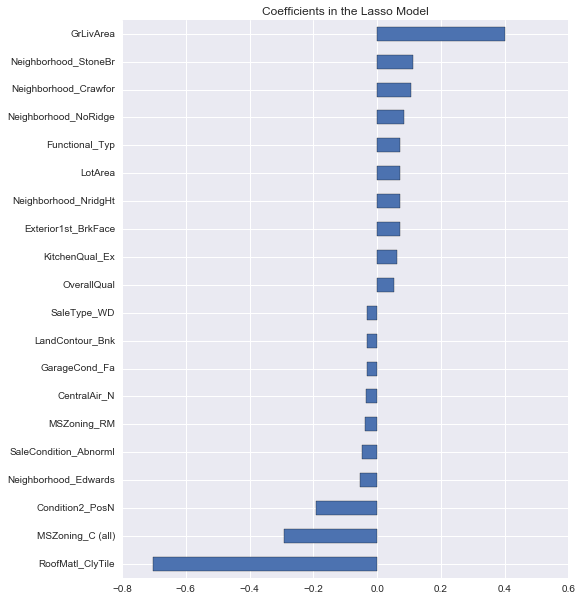

In [24]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [25]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
#preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [26]:
modelridge = RidgeCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
ridge_preds = np.expm1(modelridge.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

### Predicting Final Values

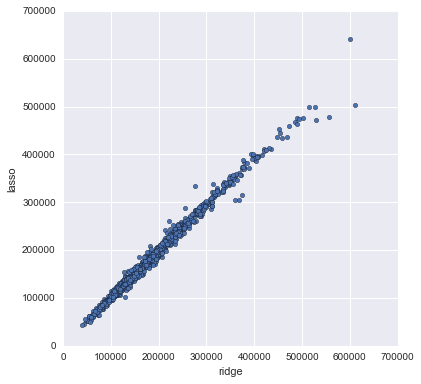

In [27]:
predictions = pd.DataFrame({"ridge":ridge_preds, "lasso":lasso_preds})

predictions.plot(x = "ridge", y = "lasso", kind = "scatter")

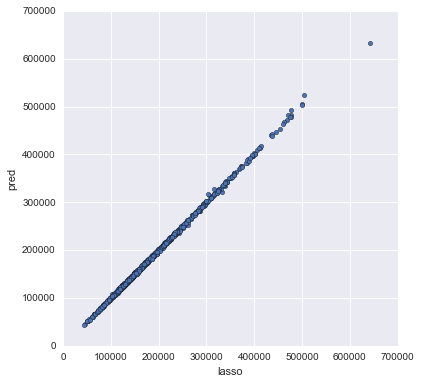

In [28]:
pred = 0.8*lasso_preds + 0.2*ridge_preds
predictions = pd.DataFrame({"lasso":lasso_preds,"pred":pred})
predictions.plot( x = "lasso", y = "pred",kind = "scatter")
#output = pd.DataFrame()

In [29]:
print (test.Id,pred)
output = pd.DataFrame({"id":test.Id, "SalePrice":pred})
output.to_csv("lassridge_sol.csv", index = False)

0       1461
1       1462
2       1463
3       1464
4       1465
5       1466
6       1467
7       1468
8       1469
9       1470
10      1471
11      1472
12      1473
13      1474
14      1475
15      1476
16      1477
17      1478
18      1479
19      1480
20      1481
21      1482
22      1483
23      1484
24      1485
25      1486
26      1487
27      1488
28      1489
29      1490
        ... 
1429    2890
1430    2891
1431    2892
1432    2893
1433    2894
1434    2895
1435    2896
1436    2897
1437    2898
1438    2899
1439    2900
1440    2901
1441    2902
1442    2903
1443    2904
1444    2905
1445    2906
1446    2907
1447    2908
1448    2909
1449    2910
1450    2911
1451    2912
1452    2913
1453    2914
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, dtype: int64 [ 120050.56006599  151959.56636222  181263.68331289 ...,  170118.53755042
  119027.0980132   226580.11919355]


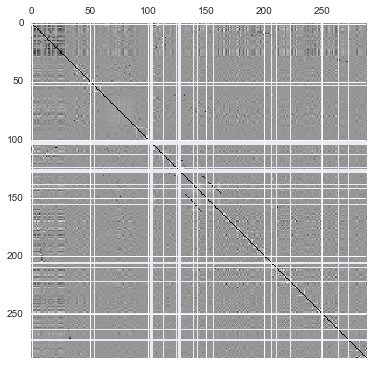

In [30]:

#pca.fit(data_matrix)

plt.matshow(X_test.corr())

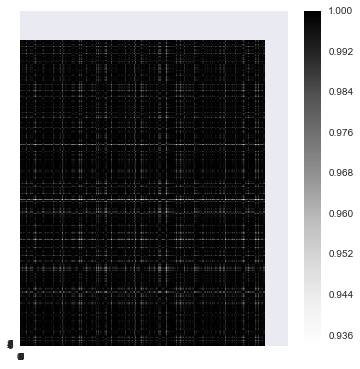

In [31]:
from pylab import pcolor, show, colorbar, xticks, yticks
R = np.corrcoef(X_test)

pcolor(R)
colorbar()
yticks(np.arange(0.5,10.5),range(0,10))
xticks(np.arange(0.5,10.5),range(0,10))
show()

In [36]:
j = 0
for i in (np.corrcoef(train[numeric_feats])[-1]):
    print (list(train)[j],"   ", i)
    j+=1

Id     0.986588401024
MSSubClass     0.998116677216
MSZoning     0.989717904014
LotFrontage     0.987514484167
LotArea     0.985821433484
Street     0.985641891161
Alley     0.994348832546
LotShape     nan
LandContour     0.955265842797
Utilities     0.990155965861
LotConfig     0.995612928864
LandSlope     0.987860677186
Neighborhood     nan
Condition1     0.984995731985
Condition2     nan
BldgType     0.966486457984
HouseStyle     nan
OverallQual     0.985748666377
OverallCond     0.990793979158
YearBuilt     0.988374151479
YearRemodAdd     0.979772203928
RoofStyle     0.983914669489
RoofMatl     0.977525927394
Exterior1st     0.916173468362
Exterior2nd     nan
MasVnrType     0.982114528447
MasVnrArea     0.98736074637
ExterQual     0.993706418259
ExterCond     0.988694101983
Foundation     0.971572784617
BsmtQual     0.984584094348
BsmtCond     nan
BsmtExposure     0.98859034081
BsmtFinType1     0.995181425216
BsmtFinSF1     0.981780808725
BsmtFinType2     0.979575543876
BsmtFinSF2 

IndexError: list index out of range

Id     0.979178665538
MSSubClass     0.989514458816
MSZoning     0.982055694415
LotFrontage     0.980271859638
LotArea     0.978321204098
Street     0.977349261261
Alley     0.986089619615
LotShape     0.982278528252
LandContour     0.950335538194
Utilities     0.982524990612
LotConfig     0.986785653267
LandSlope     0.980642201164
Neighborhood     0.98238167829
Condition1     0.978180514131
Condition2     0.98718225956
BldgType     0.961618207066
HouseStyle     0.983925715642
OverallQual     0.977842556418
OverallCond     0.981792254094
YearBuilt     0.981017760649
YearRemodAdd     0.973274544006
RoofStyle     0.977391329797
RoofMatl     0.971534643572
Exterior1st     0.915584312729
Exterior2nd     0.986153894596
MasVnrType     0.975125267885
MasVnrArea     0.980229550843
ExterQual     0.985930886834
ExterCond     0.979690968756
Foundation     0.966832376233
BsmtQual     0.978087084949
BsmtCond     0.977755487353
BsmtExposure     0.981223629208
BsmtFinType1     0.987305763681
BsmtFin

IndexError: list index out of range

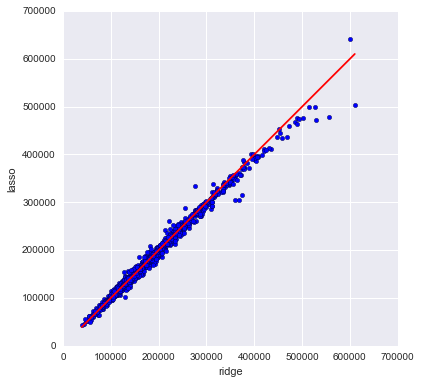

In [53]:
plt.scatter(ridge_preds, lasso_preds)
plt.xlabel('ridge')
plt.ylabel('lasso')
plt.plot( [min(ridge_preds),max(ridge_preds)], [min(ridge_preds),max(ridge_preds)], c="red")

In [1]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

In [ ]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [ ]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

In [ ]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

In [ ]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

plt.scatter(lasso_preds,xgb_preds)
plt.xlabel('lasso')
plt.ylabel('xgb')
plt.plot( [min(lasso_preds),max(lasso_preds)], [min(lasso_preds),max(lasso_preds)], c="red")